# Exploratory Data Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from loader import load_files, get_labels

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
f = '../data/{fn}.sgm'
# load the first 5 files
files = [f.format(fn='reut2-00'+str(i)) for i in range(7)]

data = load_files(files)

In [3]:
df = pd.DataFrame(data)

df.head()

,title,body,topics,places,people,orgs,exchanges,companies
0,BAHIA COCOA REVIEW,Showers continued throughout week Bahia cocoa ...,[cocoa],"[el-salvador, usa, uruguay]",None,None,None,None
1,STANDARD OIL SRD TO FORM FINANCIAL UNIT,Standard Oil Co BP North America Inc said plan...,None,[usa],None,None,None,None
2,TEXAS COMMERCE BANCSHARES TCB FILES PLAN,Texas Commerce Bancshares Incs Texas Commerce ...,None,[usa],None,None,None,None
3,TALKING POINTBANKAMERICA BAC EQUITY OFFER,BankAmerica Corp pressure act quickly proposed...,None,"[usa, brazil]",None,None,None,None
4,NATIONAL AVERAGE PRICES FOR FARMEROWNED RESERVE,The US Agriculture Department reported farmero...,"[grain, wheat, corn, barley, oat, sorghum]",[usa],None,None,None,None


In [4]:
# get number of rows where topics is not empty
topics = df['topics']

topics.dropna(inplace=True)

print(topics.shape)

(3991,)


Topics seem like an excellent candidate for classification. We would be solving a multi-class, multi-label intent recognition problem. Let's learn more about the topics.

### Distribution of Topics

(array([3.397e+03, 4.380e+02, 8.500e+01, 0.000e+00, 2.800e+01, 2.100e+01,
        1.200e+01, 0.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 1.  ,  1.75,  2.5 ,  3.25,  4.  ,  4.75,  5.5 ,  6.25,  7.  ,
         7.75,  8.5 ,  9.25, 10.  , 10.75, 11.5 , 12.25, 13.  , 13.75,
        14.5 , 15.25, 16.  ]),
 <BarContainer object of 20 artists>)

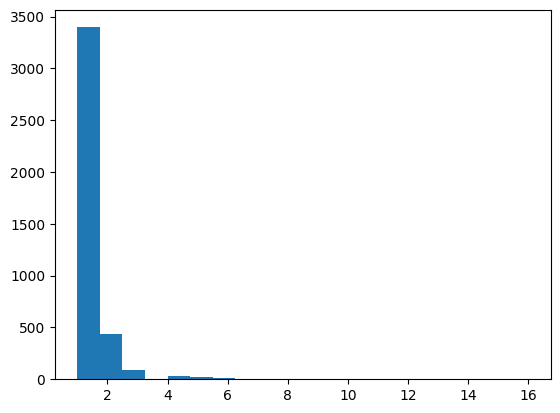

In [5]:
# get average number of topics per document
num_topics = topics.apply(lambda x: len(x))

plt.hist(num_topics, bins=20)

In [6]:
average_num_topics = num_topics.mean()
std_num_topics = num_topics.std()
median_num_topics = num_topics.median()
max_num_topics = num_topics.max()

print("Average number of topics per document: ", average_num_topics)
print("Standard deviation of number of topics per document: ", std_num_topics)
print("Median number of topics per document: ", median_num_topics)
print("Maximum number of topics per document: ", max_num_topics)
print("Minimum number of topics per document: ", num_topics.min())

Average number of topics per document:  1.2307692307692308
Standard deviation of number of topics per document:  0.7496802222979116
Median number of topics per document:  1.0
Maximum number of topics per document:  16
Minimum number of topics per document:  1


Now, let's see what the most popular topics are.

In [7]:
all_topics = get_labels('topics')

idx_to_topic = {i: all_topics[i] for i in range(len(all_topics))}
topic_to_idx = {all_topics[i]: i for i in range(len(all_topics))}

In [11]:
# get the frequency of each topic
topic_counts = {topic: 0 for topic in all_topics}

for doc_topics in topics:
    for topic in doc_topics:
        topic_counts[topic] += 1

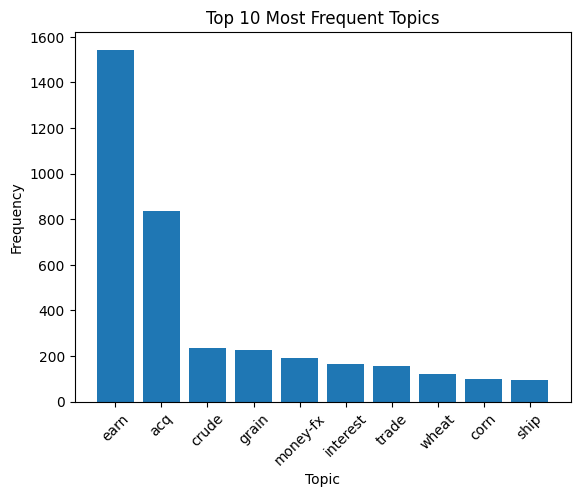

In [16]:
sorted_topics = sorted(topic_counts.items(), key=lambda x: x[1], reverse=True)

plt.bar(range(10), [x[1] for x in sorted_topics[:10]])

plt.title('Top 10 Most Frequent Topics')
plt.ylabel('Frequency')
plt.xlabel('Topic')

plt.xticks(range(10), [x[0] for x in sorted_topics[:10]], rotation=45)

plt.show()